In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-structure-sparseband)


```{index} ! Julia; spdiagm
```

The `spdiagm` function creates a sparse matrix given its diagonal elements. The main or central diagonal is numbered zero, above and to the right of that is positive, and below and to the left is negative.

In [2]:
using SparseArrays
n = 50;
A = spdiagm(-3 => fill(n, n - 3),
    0 => ones(n),
    1 => -(1:n-1),
    5 => fill(0.1, n - 5))
Matrix(A[1:7, 1:7])

7×7 Matrix{Float64}:
  1.0  -1.0   0.0   0.0   0.0   0.1   0.0
  0.0   1.0  -2.0   0.0   0.0   0.0   0.1
  0.0   0.0   1.0  -3.0   0.0   0.0   0.0
 50.0   0.0   0.0   1.0  -4.0   0.0   0.0
  0.0  50.0   0.0   0.0   1.0  -5.0   0.0
  0.0   0.0  50.0   0.0   0.0   1.0  -6.0
  0.0   0.0   0.0  50.0   0.0   0.0   1.0

```{index} ! Julia; sparse
```

```{tip}
:class: dropdown
The `sparse` function converts any matrix to sparse form. But it's usually better to construct a sparse matrix directly, as the standard form might not fit in memory.
```

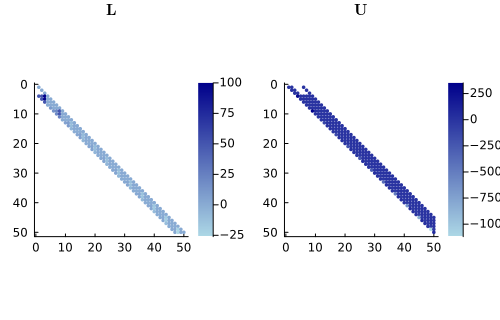

In [3]:
L, U = FNC.lufact(A)
plot(layout=2)
spy!(sparse(L), m=2, subplot=1, title=L"\mathbf{L}", color=:blues)
spy!(sparse(U), m=2, subplot=2, title=L"\mathbf{U}", color=:blues)

However, if we introduce row pivoting, bandedness may be expanded or destroyed.

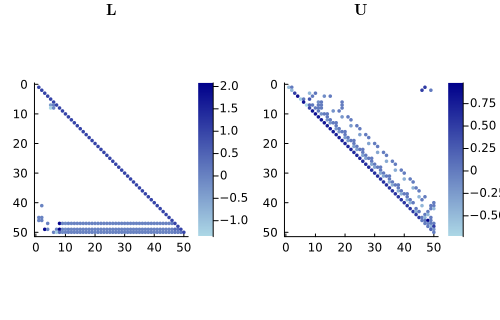

In [4]:
fact = lu(A)
plot(layout=2)
spy!(sparse(fact.L), m=2, subplot=1, title=L"\mathbf{L}", color=:blues)
spy!(sparse(fact.U), m=2, subplot=2, title=L"\mathbf{U}", color=:blues)